<a href="https://colab.research.google.com/github/cor1234/Amazon-Website/blob/master/Another_copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy.io
import keras
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Flatten, Dropout,MaxPooling1D, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras import backend as K
from keras.callbacks import Callback
import warnings
import tensorflow.compat.v1 as ty
ty.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
FS = 300
WINDOW_SIZE = 30*FS

In [ ]:
print("Loading data training set")
matfile = scipy.io.loadmat('/content/drive/MyDrive/trainingset.mat')
X_train = matfile['trainset']
y_train = matfile['traintarget']
X_train =  X_train[:,0:WINDOW_SIZE]
print(X_train.shape)
X_train[0][0]

Loading data training set
(8528, 9000)


-0.8648478526564592

In [ ]:
batch = 64
epochs = 2
rep = 1
Kfold = 5
Ntrain = 8528
Nsamp = int(Ntrain/Kfold)
X_train = np.expand_dims(X_train, axis=-1)
print(X_train.shape)
classes = ['A', 'N', 'O', '~']
Nclass = len(classes)

(8528, 9000, 1)


In [ ]:
# idxval = np.random.choice(Ntrain, Nsamp, replace=False)
# idxtrain = np.setdiff1d(np.arange(Ntrain), idxval)

# Xtrain = X_train[idxtrain]
# Xval = X_train[idxval]
# ytrain = y_train[idxtrain]
# yval = y_train[idxval]

# Xtrain_tf = tf.constant(Xtrain)
# Xval_tf = tf.constant(Xval)
# ytrain_tf = tf.(ytrain)
# yval_tf = tf.constant(yval)
# current_shape = Xtrain_tf.shape.as_list()


# print("Xtrain shape:", Xtrain_tf.shape)
# print("ytrain shape:", ytrain_tf.shape)
# print("Xval shape:", Xval_tf.shape)
# print("yval shape:", yval_tf.shape)

In [ ]:
import tensorflow as tf
from keras import layers, models
OUTPUT_CLASS = 4
WINDOW_SIZE = 9000

input1 = Input(shape=(WINDOW_SIZE, 1), name='input')
x1 = Conv1D(filters=16, kernel_size=5, padding='same', strides=1, kernel_initializer='he_normal')(input1)
x1 = Activation('relu')(x1)
x1 = Conv1D(filters=16, kernel_size=6, padding='same', strides=1, kernel_initializer='he_normal')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = Conv1D(filters=32, kernel_size=7, padding='same', strides=1, kernel_initializer='he_normal')(x1)
x1 = Activation('relu')(x1)
x1 = Conv1D(filters=32, kernel_size=10, padding='same', strides=1, kernel_initializer='he_normal')(x1)
x1 = MaxPooling1D(pool_size=2, strides=2)(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = Conv1D(filters=64, kernel_size=7, padding='same', strides=1, kernel_initializer='he_normal')(x1)
x1 = MaxPooling1D(pool_size=4, strides=4)(x1)
x1 = Conv1D(filters=64, kernel_size=10, padding='same', strides=1, kernel_initializer='he_normal')(x1)
x1 = MaxPooling1D(pool_size=2, strides=2)(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = Flatten()(x1)
x1 = Dense(10)(x1)  # Decreased number of units in Dense layer
out = Dense(OUTPUT_CLASS, activation='softmax')(x1)
model = Model(inputs=input1, outputs=out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# sequential_model_to_ascii_printout(model)
# plot_model(model, to_file='model.png')

Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 9000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 9000, 16)          96        
                                                                 
 activation (Activation)     (None, 9000, 16)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9000, 16)          1552      
                                                                 
 batch_normalization (Batch  (None, 9000, 16)          64        
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 9000, 16)          0         
                                                             

In [ ]:
history=model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=256, epochs=100, verbose=1, shuffle=True)

Train on 6822 samples, validate on 1706 samples
Epoch 1/100
6822/6822 [==============================] - ETA: 0s - loss: 4.5914 - acc: 0.4645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6822/6822 [==============================] - 36s 5ms/sample - loss: 4.5914 - acc: 0.4645 - val_loss: 4.1982 - val_acc: 0.4009
Epoch 2/100
6822/6822 [==============================] - 14s 2ms/sample - loss: 1.2531 - acc: 0.5176 - val_loss: 1.5881 - val_acc: 0.4238
Epoch 3/100
6822/6822 [==============================] - 13s 2ms/sample - loss: 1.0092 - acc: 0.5679 - val_loss: 1.1765 - val_acc: 0.5158
Epoch 4/100
6822/6822 [==============================] - 13s 2ms/sample - loss: 0.9558 - acc: 0.5869 - val_loss: 1.1403 - val_acc: 0.5317
Epoch 5/100
6822/6822 [==============================] - 13s 2ms/sample - loss: 0.9286 - acc: 0.6023 - val_loss: 1.3174 - val_acc: 0.5657
Epoch 6/100
6822/6822 [==============================] - 13s 2ms/sample - loss: 0.9410 - acc: 0.5997 - val_loss: 1.2475 - val_acc: 0.4789
Epoch 7/100
6822/6822 [==============================] - 13s 2ms/sample - loss: 0.9314 - acc: 0.5941 - val_loss: 1.3999 - val_acc: 0.5627
Epoch 8/100
6822/6822 [=======================

In [ ]:
from sklearn.model_selection import train_test_split

# Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Split the data into training and testing sets

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cnn_predictions = model.predict(X_test)
cnn_pred_classes = np.where(cnn_predictions > 0.5, 1, 0)
cnn_cm = multilabel_confusion_matrix(y_test, cnn_pred_classes)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


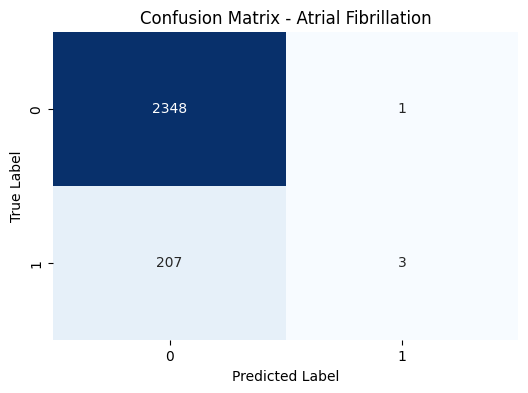

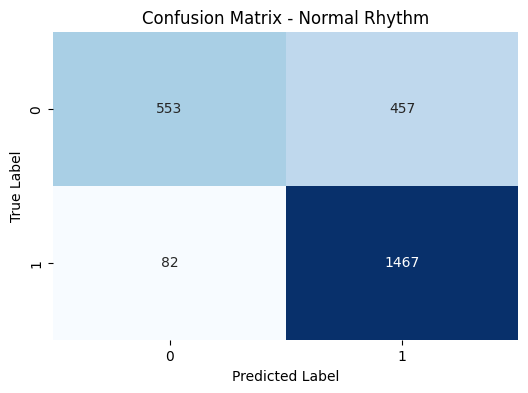

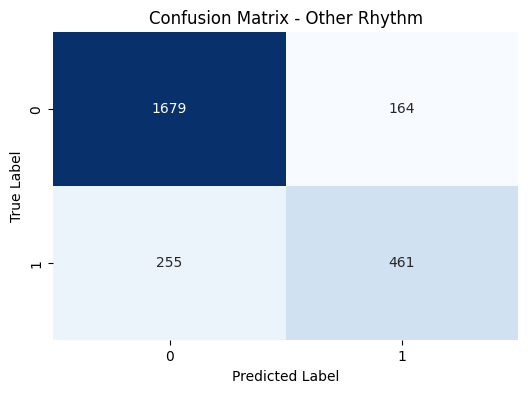

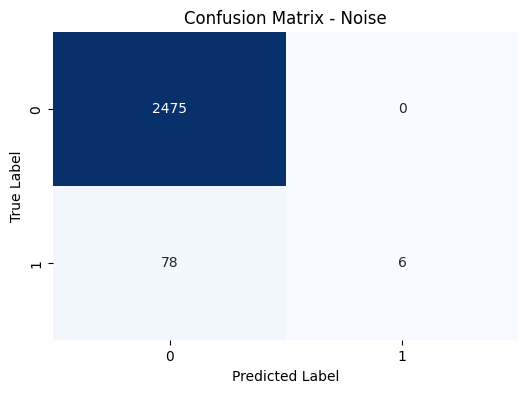

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have defined cnn_cm as mentioned in your code
class_names = ["Atrial Fibrillation", "Normal Rhythm", "Other Rhythm", "Noise"]  # Replace with your actual class names

for i, cm in enumerate(cnn_cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - ' + class_names[i])  # Modify title to include class name
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


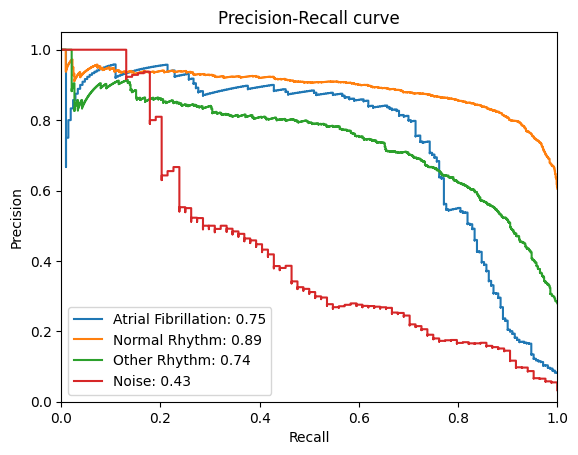

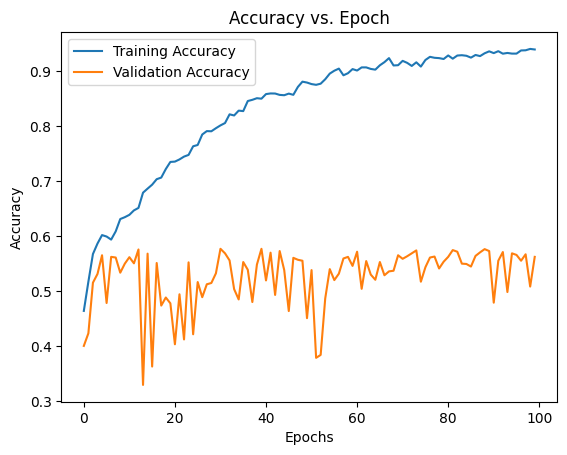

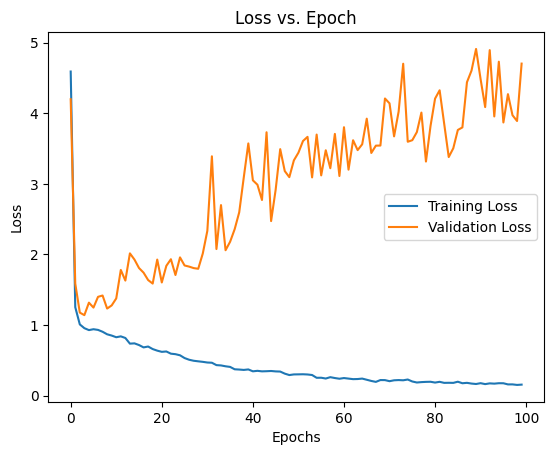

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


# Compute precision and recall for each class separately
precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], cnn_predictions[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], cnn_predictions[:, i])

# Plot Precision-Recall curves for each class
plt.figure()
for i in range(4):
    plt.step(recall[i], precision[i], where='post', label=class_names[i] + ': {:.2f}'.format(average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

# Plot Accuracy vs. Epoch
plt.figure()
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# Plot Loss vs. Epoch
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()
